In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt

In [4]:
!ls 'drive/My Drive/TryLogic/tajmahal2.jpg'

'drive/My Drive/TryLogic/tajmahal2.jpg'


In [6]:
!pip install opencv-python==3.4.2.16

     |████████████████████████████████| 25.0MB 1.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [7]:
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 30.6MB 145kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [0]:
import cv2

## Applying SIFT Algorithm

In [0]:
# lets check the documentation of sift algorithm
help(cv2.xfeatures2d.SIFT_create)

Help on built-in function SIFT_create:

SIFT_create(...)
    SIFT_create([, nfeatures[, nOctaveLayers[, contrastThreshold[, edgeThreshold[, sigma]]]]]) -> retval
    .   @param nfeatures The number of best features to retain. The features are ranked by their scores
    .   (measured in SIFT algorithm as the local contrast)
    .   
    .   @param nOctaveLayers The number of layers in each octave. 3 is the value used in D. Lowe paper. The
    .   number of octaves is computed automatically from the image resolution.
    .   
    .   @param contrastThreshold The contrast threshold used to filter out weak features in semi-uniform
    .   (low-contrast) regions. The larger the threshold, the less features are produced by the detector.
    .   
    .   @param edgeThreshold The threshold used to filter out edge-like features. Note that the its meaning
    .   is different from the contrastThreshold, i.e. the larger the edgeThreshold, the less features are
    .   filtered out (more features 

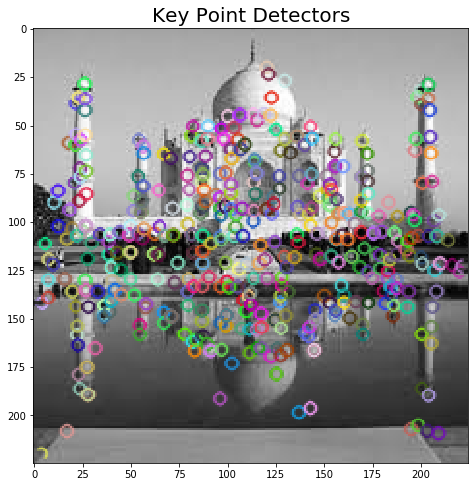

In [8]:
#reading image
img1 = cv2.imread('drive/My Drive/TryLogic/tajmahal2.jpg')  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.rcParams['figure.figsize'] = (21, 8)
plt.imshow(img_1)
plt.title('Key Point Detectors', fontsize = 20)
plt.show()

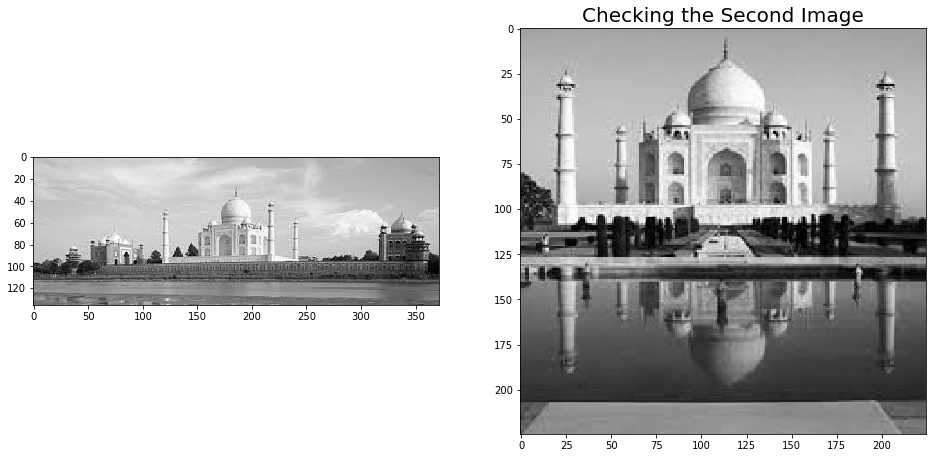

In [9]:

import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('drive/My Drive/TryLogic/tajmahal1.jpg')  
img2 = cv2.imread('drive/My Drive/TryLogic/tajmahal2.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')
plt.title('Checking the Second Image', fontsize = 20)
plt.show()

In [10]:

import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('drive/My Drive/TryLogic/tajmahal1.jpg')  
img2 = cv2.imread('drive/My Drive/TryLogic/tajmahal2.jpg') 


img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)

(238, 478)

In [0]:
len(descriptors_1), len(descriptors_2)

(238, 478)

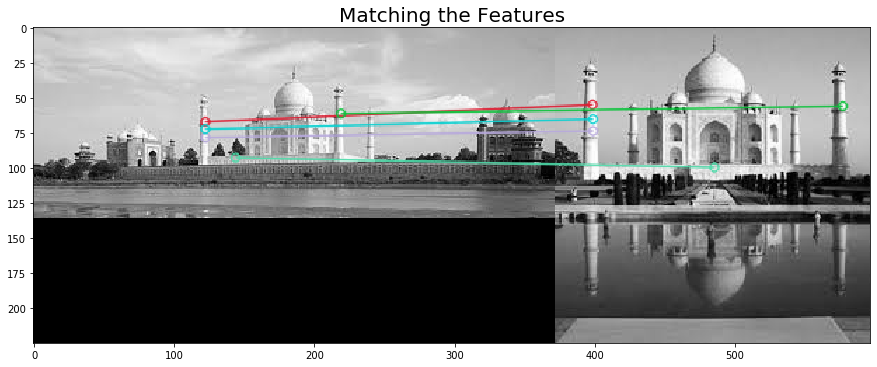

In [12]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('drive/My Drive/TryLogic/tajmahal1.jpg')  
img2 = cv2.imread('drive/My Drive/TryLogic/tajmahal2.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

plt.rcParams['figure.figsize'] = (15, 18)
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:5], img2, flags=2)
plt.imshow(img3)
plt.title('Matching the Features', fontsize = 20)
plt.show()

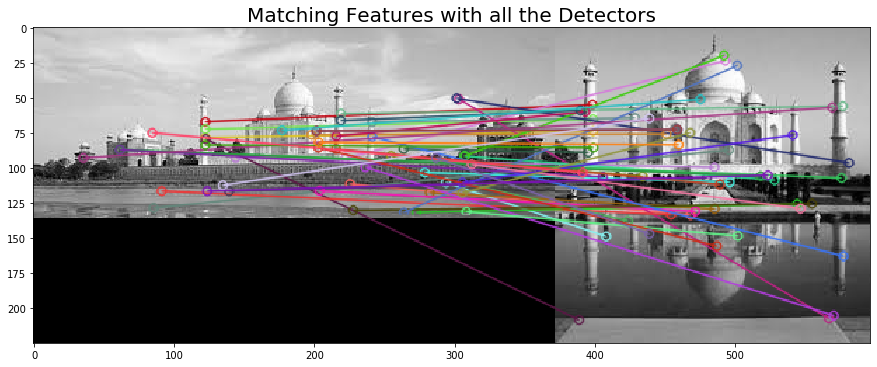

In [13]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('drive/My Drive/TryLogic/tajmahal1.jpg')  
img2 = cv2.imread('drive/My Drive/TryLogic/tajmahal2.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

plt.rcParams['figure.figsize'] = (15, 18)
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3)
plt.title('Matching Features with all the Detectors', fontsize = 20)
plt.show()

In [0]:
print(len(matches))

181


In [0]:
from pprint import pprint

pprint(matches)

[<DMatch 0x7f738931fc50>,
 <DMatch 0x7f73894c34b0>,
 <DMatch 0x7f738931fcb0>,
 <DMatch 0x7f738931fc70>,
 <DMatch 0x7f738931fe90>,
 <DMatch 0x7f73894c3570>,
 <DMatch 0x7f73894c36f0>,
 <DMatch 0x7f738931fab0>,
 <DMatch 0x7f73894c35f0>,
 <DMatch 0x7f738931fd10>,
 <DMatch 0x7f73894c38d0>,
 <DMatch 0x7f738931faf0>,
 <DMatch 0x7f73894c3870>,
 <DMatch 0x7f73894c3770>,
 <DMatch 0x7f738931fe70>,
 <DMatch 0x7f73894c37d0>,
 <DMatch 0x7f73894c3990>,
 <DMatch 0x7f73894c36b0>,
 <DMatch 0x7f73894c3810>,
 <DMatch 0x7f73894c3930>,
 <DMatch 0x7f73894c3390>,
 <DMatch 0x7f73894c3510>,
 <DMatch 0x7f73894c3590>,
 <DMatch 0x7f73894c3890>,
 <DMatch 0x7f73894c3710>,
 <DMatch 0x7f73894c3230>,
 <DMatch 0x7f73894c35d0>,
 <DMatch 0x7f738931f8d0>,
 <DMatch 0x7f738931f2b0>,
 <DMatch 0x7f73894c39b0>,
 <DMatch 0x7f73894c3630>,
 <DMatch 0x7f738931f2f0>,
 <DMatch 0x7f738931f910>,
 <DMatch 0x7f73894c3a10>,
 <DMatch 0x7f73894c3910>,
 <DMatch 0x7f73894c3410>,
 <DMatch 0x7f73894c39d0>,
 <DMatch 0x7f73894c3350>,
 <DMatch 0x7

## Applying SURF Algorithm

In [14]:
# lets check the documentation of surf algorithm
help(cv2.xfeatures2d.SURF_create)

Help on built-in function SURF_create:

SURF_create(...)
    SURF_create([, hessianThreshold[, nOctaves[, nOctaveLayers[, extended[, upright]]]]]) -> retval
    .   @param hessianThreshold Threshold for hessian keypoint detector used in SURF.
    .   @param nOctaves Number of pyramid octaves the keypoint detector will use.
    .   @param nOctaveLayers Number of octave layers within each octave.
    .   @param extended Extended descriptor flag (true - use extended 128-element descriptors; false - use
    .   64-element descriptors).
    .   @param upright Up-right or rotated features flag (true - do not compute orientation of features;
    .   false - compute orientation).



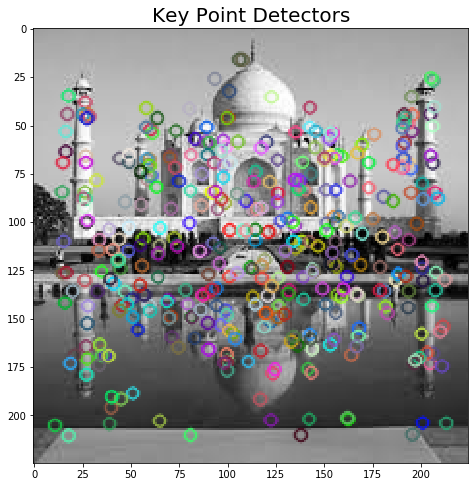

In [16]:
#reading image
img1 = cv2.imread('drive/My Drive/TryLogic/tajmahal2.jpg')  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
surf = cv2.xfeatures2d.SURF_create()
keypoints_1, descriptors_1 = surf.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.rcParams['figure.figsize'] = (21, 8)
plt.imshow(img_1)
plt.title('Key Point Detectors', fontsize = 20)
plt.show()

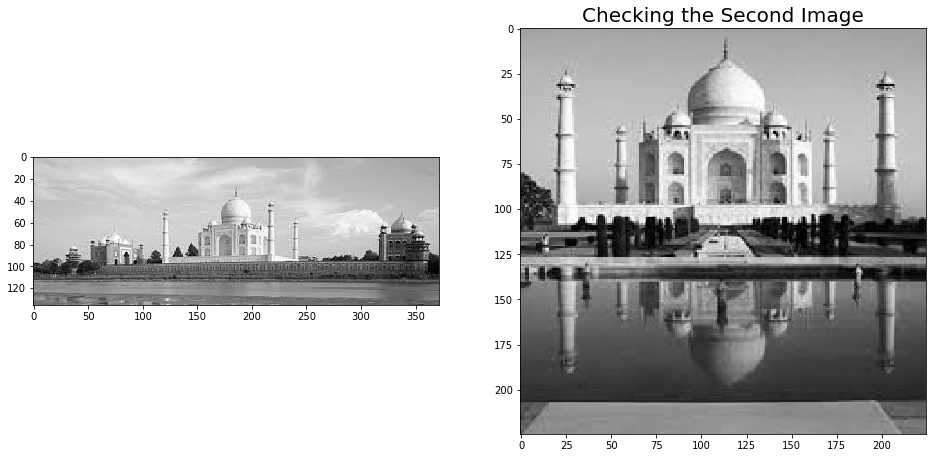

In [17]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('drive/My Drive/TryLogic/tajmahal1.jpg')  
img2 = cv2.imread('drive/My Drive/TryLogic/tajmahal2.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')
plt.title('Checking the Second Image', fontsize = 20)
plt.show()

In [18]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('drive/My Drive/TryLogic/tajmahal1.jpg')  
img2 = cv2.imread('drive/My Drive/TryLogic/tajmahal2.jpg') 


img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#surf
surf = cv2.xfeatures2d.SURF_create()

keypoints_1, descriptors_1 = surf.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = surf.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)

(344, 385)

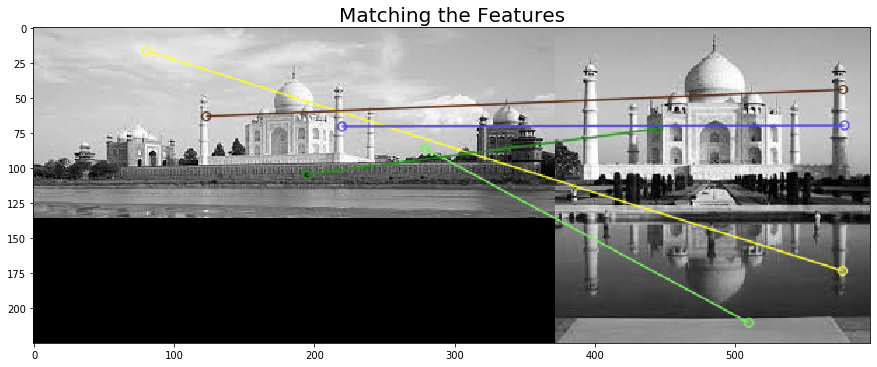

In [19]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('drive/My Drive/TryLogic/tajmahal1.jpg')  
img2 = cv2.imread('drive/My Drive/TryLogic/tajmahal2.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#surf
surf = cv2.xfeatures2d.SURF_create()

keypoints_1, descriptors_1 = surf.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = surf.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

plt.rcParams['figure.figsize'] = (15, 18)
img3 = cv2.drawMatches(img1,
                       keypoints_1,
                       img2,
                       keypoints_2,
                       matches[:5],
                       img2,
                       flags=2)
plt.imshow(img3)
plt.title('Matching the Features', fontsize = 20)
plt.show()

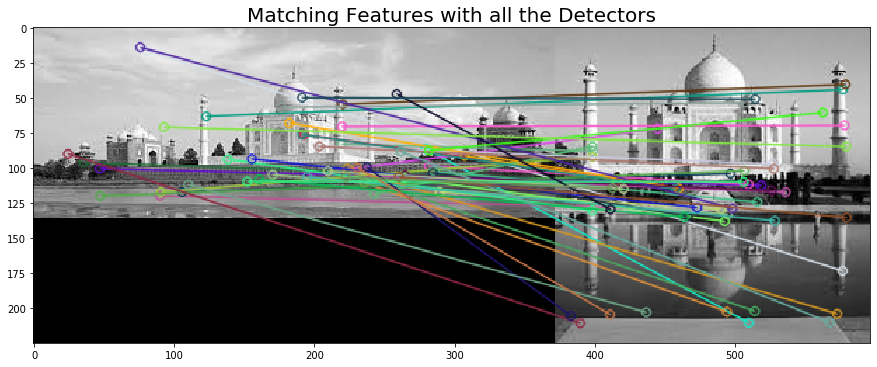

In [20]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('drive/My Drive/TryLogic/tajmahal1.jpg')  
img2 = cv2.imread('drive/My Drive/TryLogic/tajmahal2.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#surf
surf = cv2.xfeatures2d.SURF_create()

keypoints_1, descriptors_1 = surf.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = surf.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

plt.rcParams['figure.figsize'] = (15, 18)
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3)
plt.title('Matching Features with all the Detectors', fontsize = 20)
plt.show()

In [21]:
print(len(matches))

157


In [22]:
help(cv2.xfeatures2d)

Help on module cv2.xfeatures2d in cv2:

NAME
    cv2.xfeatures2d

FUNCTIONS
    BoostDesc_create(...)
        BoostDesc_create([, desc[, use_scale_orientation[, scale_factor]]]) -> retval
        .
    
    BriefDescriptorExtractor_create(...)
        BriefDescriptorExtractor_create([, bytes[, use_orientation]]) -> retval
        .
    
    DAISY_create(...)
        DAISY_create([, radius[, q_radius[, q_theta[, q_hist[, norm[, H[, interpolation[, use_orientation]]]]]]]]) -> retval
        .
    
    FREAK_create(...)
        FREAK_create([, orientationNormalized[, scaleNormalized[, patternScale[, nOctaves[, selectedPairs]]]]]) -> retval
        .   @param orientationNormalized Enable orientation normalization.
        .   @param scaleNormalized Enable scale normalization.
        .   @param patternScale Scaling of the description pattern.
        .   @param nOctaves Number of octaves covered by the detected keypoints.
        .   @param selectedPairs (Optional) user defined selected pa